In [13]:
import numpy as np
import os, cv2, csv
# from DAVE2 import DAVE2Model
# from DAVE2pytorch import DAVE2PytorchModel
import kornia

from PIL import Image
import copy
from scipy import stats
import torch.utils.data as data
from pathlib import Path
import skimage.io as sio
import pandas as pd
import torch
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import random
from torchvision.transforms import Compose, ToPILImage, ToTensor
from torchvision.transforms import Compose, ToTensor, PILToTensor, functional as transforms
# from io import BytesIO
# import skimage
from dataset_unsplit import MultiDirectoryDataSequence


# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
image_dataset = MultiDirectoryDataSequence(root="first_try")

Found 2234 images in 4 directories
Directories: ['20231126_201556', '20231126_203514', '20231127_184018', '20231127_185723']
Found 4 csv files
csv files: ['first_try\\20231126_201556_data.csv', 'first_try\\20231126_203514_data.csv', 'first_try\\20231127_184018_data.csv', 'first_try\\20231127_185723_data.csv']


In [30]:
image_dataset[892]

{'image': tensor([[[0.9765, 0.9490, 0.8549,  ..., 0.5373, 0.5373, 0.5373],
          [0.9765, 0.9529, 0.8588,  ..., 0.5373, 0.5373, 0.5373],
          [0.9804, 0.9529, 0.8667,  ..., 0.5451, 0.5373, 0.5373],
          ...,
          [0.6157, 0.6118, 0.6196,  ..., 0.5725, 0.5647, 0.5608],
          [0.6157, 0.6157, 0.6196,  ..., 0.5765, 0.5686, 0.5647],
          [0.6118, 0.6118, 0.6157,  ..., 0.5765, 0.5686, 0.5686]],
 
         [[0.8431, 0.8235, 0.7608,  ..., 0.5373, 0.5373, 0.5373],
          [0.8431, 0.8314, 0.7647,  ..., 0.5373, 0.5373, 0.5373],
          [0.8471, 0.8314, 0.7725,  ..., 0.5451, 0.5373, 0.5373],
          ...,
          [0.5804, 0.5765, 0.5843,  ..., 0.5294, 0.5216, 0.5176],
          [0.5804, 0.5804, 0.5843,  ..., 0.5333, 0.5255, 0.5216],
          [0.5765, 0.5765, 0.5804,  ..., 0.5333, 0.5255, 0.5255]],
 
         [[0.7216, 0.7137, 0.6588,  ..., 0.5686, 0.5686, 0.5686],
          [0.7255, 0.7176, 0.6667,  ..., 0.5686, 0.5686, 0.5686],
          [0.7255, 0.7176, 0.66

In [31]:
image_dataset.get_outputs_distribution()

{'shape': (4468,),
 'mean': -0.004768516349017573,
 'median': 0.0,
 'var': 0.06301188086628651,
 'skew': 0.04692108272554755,
 'kurtosis': 6.171934829459696,
 'max': 0.800000011920929,
 'min': -0.800000011920929,
 'proportion of turning': 0.12846911369740377}

In [32]:
all_steering_angles = image_dataset.get_steering_angles()

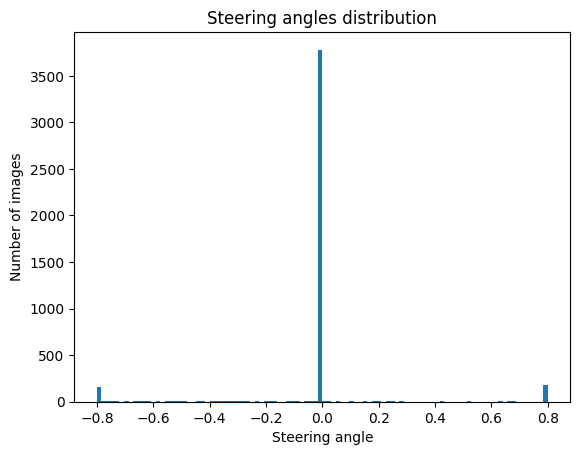

In [33]:
# draw steering angles distribution as histogram
plt.hist(all_steering_angles, bins=100)
plt.xlabel('Steering angle')
plt.ylabel('Number of images')
plt.title('Steering angles distribution')
plt.show()

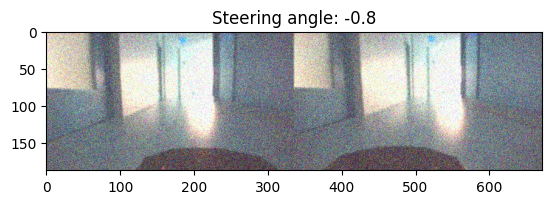

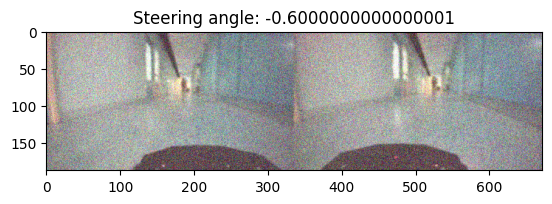

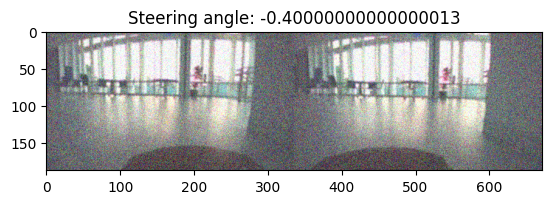

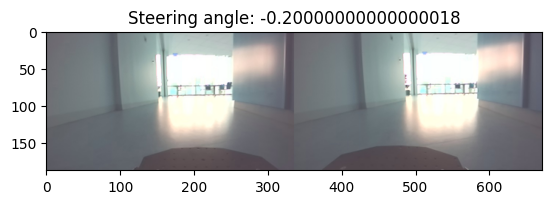

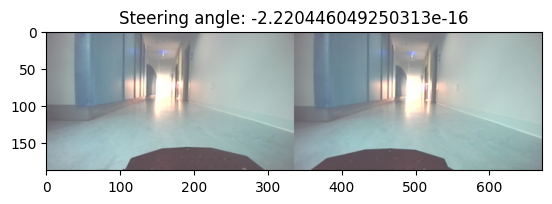

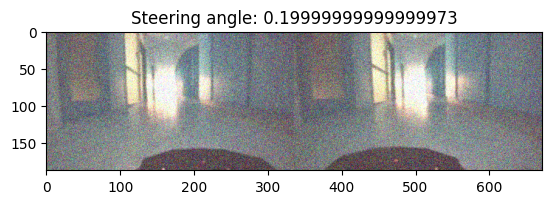

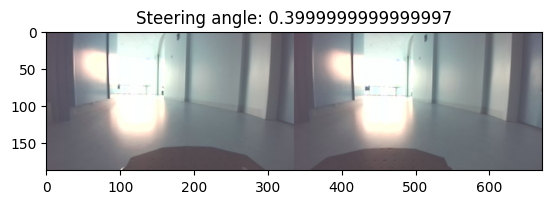

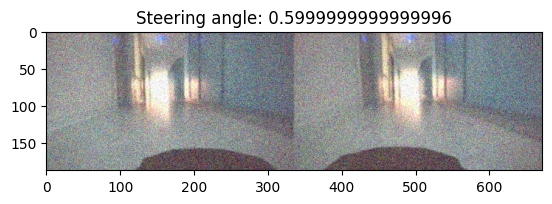

In [14]:
# show example image at each steering angle from -0.8 to 0.8 with step 0.2
for steering_angle in np.arange(-0.8, 0.8, 0.2):
    img = image_dataset.get_image_by_steering_angle(steering_angle)
    # print(img_path)
    # img = cv2.imread(img_path)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure()
    plt.imshow(img)
    plt.title(f"Steering angle: {steering_angle}")
    plt.show()